## Klasyfikacja liniowa

Importy i stałe

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

SEED = 249919
SAMPLES = 2419

Implementacja analityczna

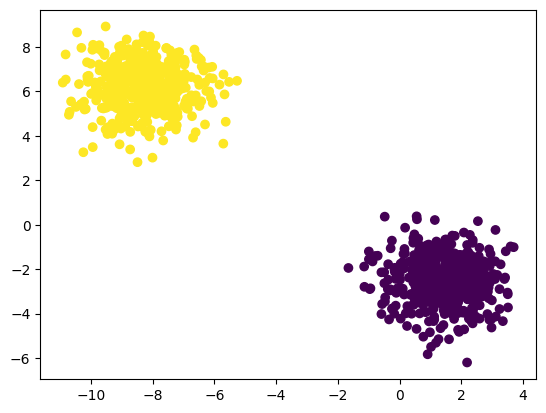

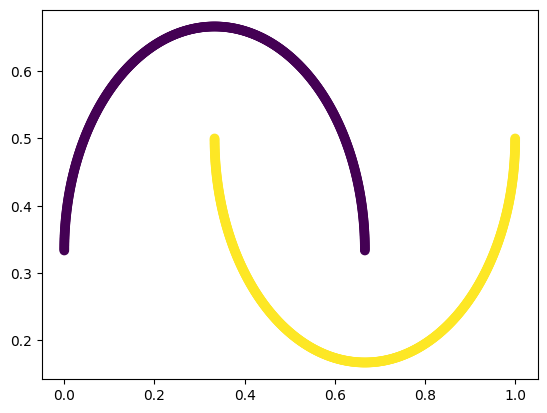

In [91]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

Xb, yb = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=SEED)
X, y = make_moons(n_samples=1000, random_state=SEED)
X = NormalizeData(X)

plt.scatter(Xb[:,0], Xb[:,1], label = "Data", c = yb)
plt.show()
plt.scatter(X[:,0], X[:,1], label = "Data", c = y)
plt.show()

Implementacja sklearn

In [92]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=SEED)

clf = RidgeClassifier().fit(Xb_train, yb_train)
clf.score(Xb_test, yb_test)
print(f"Blobs {clf.score(Xb_test, yb_test)}")

clf = RidgeClassifier().fit(X_train, y_train)
print(f"Moon {clf.score(X_test, y_test)}")


Blobs 1.0
Moon 0.88


Implementacja analityczna

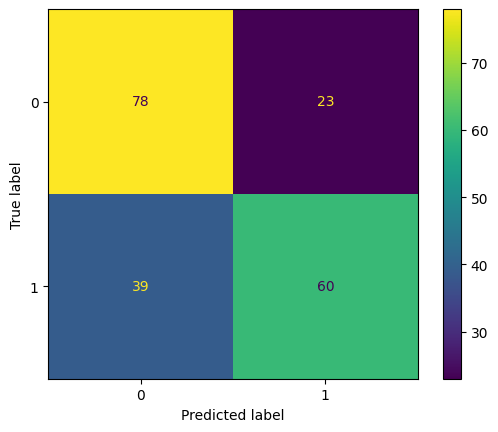

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve


def tichonow(x,y,l=1):
    temp = x.T @ x
    res = np.linalg.inv((temp + np.ones(temp.shape) * l)) @ x.T @ y
    return res

w = tichonow(X_train, y_train,l=1)
predY = X_test @ w

labels = np.array(list(set(y)))
nearest_indices = np.abs(np.subtract.outer(labels, predY)).argmin(axis=0)
predY = labels[nearest_indices]

ConfusionMatrixDisplay.from_predictions(y_test,predY)

confMatrix = confusion_matrix(y_test,predY)


Sensitivity 0.6060606060606061
Specificity 0.7722772277227723


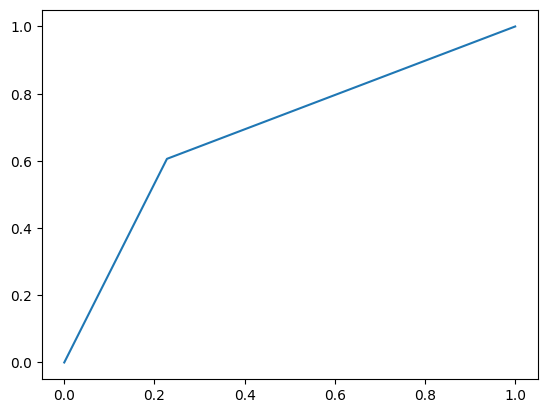

In [94]:
tn, fp, fn, tp = confMatrix.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print(f"Sensitivity {sensitivity}")
print(f"Specificity {specificity}")

fpr, tpr, thresholds = roc_curve(y_test, predY)
plt.plot(fpr,tpr)
plt.show()

Sensitivity 0.6060606060606061
Specificity 0.7722772277227723


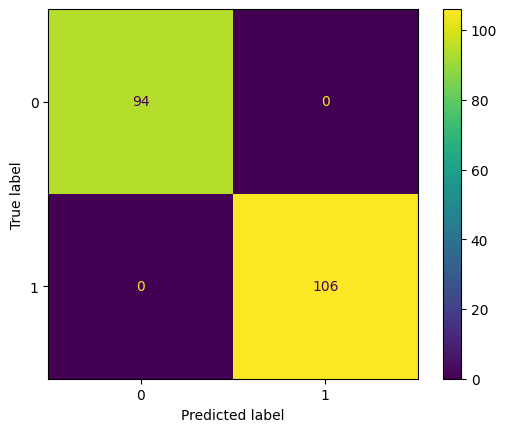

In [95]:
wb = tichonow(Xb_train, yb_train,l=1)
predYb = Xb_test @ wb

labels = np.array(list(set(yb)))
nearest_indices = np.abs(np.subtract.outer(labels, predYb)).argmin(axis=0)
predYb = labels[nearest_indices]

ConfusionMatrixDisplay.from_predictions(yb_test,predYb)

confMatrix = confusion_matrix(y_test,predY)
tn, fp, fn, tp = confMatrix.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print(f"Sensitivity {sensitivity}")
print(f"Specificity {specificity}")

Sensitivity 0.6060606060606061
Specificity 0.7722772277227723


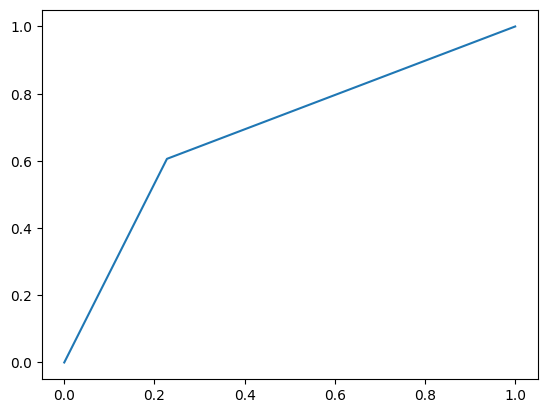

In [96]:
tn, fp, fn, tp = confMatrix.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print(f"Sensitivity {sensitivity}")
print(f"Specificity {specificity}")

fpr, tpr, thresholds = roc_curve(y_test, predY)
plt.plot(fpr,tpr)
plt.show()